In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rainfall-in-india/rainfall in india 1901-2015.csv
/kaggle/input/rainfall-in-india/district wise rainfall normal.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("../input/rainfall-in-india/rainfall in india 1901-2015.csv")
zx=pd.read_csv("../input/rainfall-in-india/district wise rainfall normal.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [6]:
zx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [7]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [8]:
zx

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


# India total rainfall between 1901-2015

In [9]:
df2=df[['SUBDIVISION','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].groupby("SUBDIVISION").sum().reset_index().copy()

In [10]:
df2

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,ANDAMAN & NICOBAR ISLANDS,5790.1,3079.4,3437.0,7800.1,38919.2,50930.7,43204.6,43205.1,47024.6,31348.6,25244.4,16386.5
1,ARUNACHAL PRADESH,4540.6,8747.2,14585.1,25592.1,34776.7,62147.9,66676.3,48037.3,41917.0,18495.2,3391.2,2327.7
2,ASSAM & MEGHALAYA,1952.1,3615.8,9088.1,23358.3,39277.0,58668.6,56936.8,46528.2,35734.5,17493.6,3097.9,1029.4
3,BIHAR,1539.4,1655.3,1164.3,1945.6,6104.4,20046.3,37310.8,34459.0,24999.2,7253.6,825.5,424.9
4,CHHATTISGARH,1633.8,2214.8,1755.7,1928.9,2420.6,22800.6,45836.4,44835.4,25044.7,7320.9,1353.8,603.6
5,COASTAL ANDHRA PRADESH,860.6,1486.2,1520.5,3075.2,7193.2,14224.8,19989.8,20231.2,20896.4,21333.8,8958.9,1313.3
6,COASTAL KARNATAKA,220.9,174.6,731.1,3555.4,14120.6,96752.5,129608.3,82066.1,34460.0,21223.5,7314.9,1450.6
7,EAST MADHYA PRADESH,2231.2,2149.8,1568.3,826.7,1066.4,16218.4,42708.5,42477.4,22337.2,4563.9,1461.1,966.5
8,EAST RAJASTHAN,738.6,623.0,519.4,361.6,1129.3,7290.9,25685.0,25101.9,11267.5,1651.5,560.5,419.9
9,EAST UTTAR PRADESH,1841.4,1825.5,1024.4,739.5,1979.3,12731.9,33415.4,31695.6,21228.0,4935.9,527.9,664.3


**January**

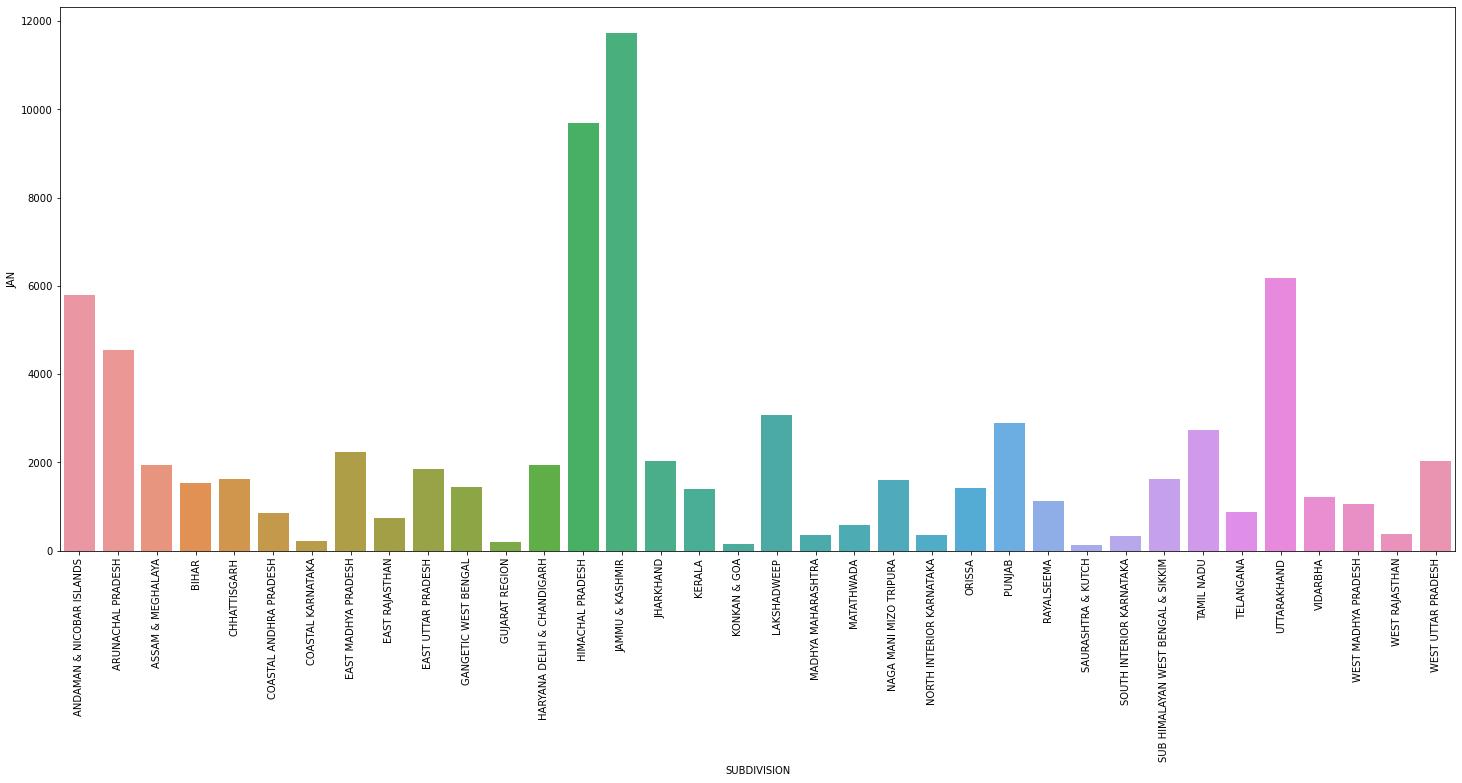

In [11]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="JAN")
plt.xticks(rotation=90)
plt.show()

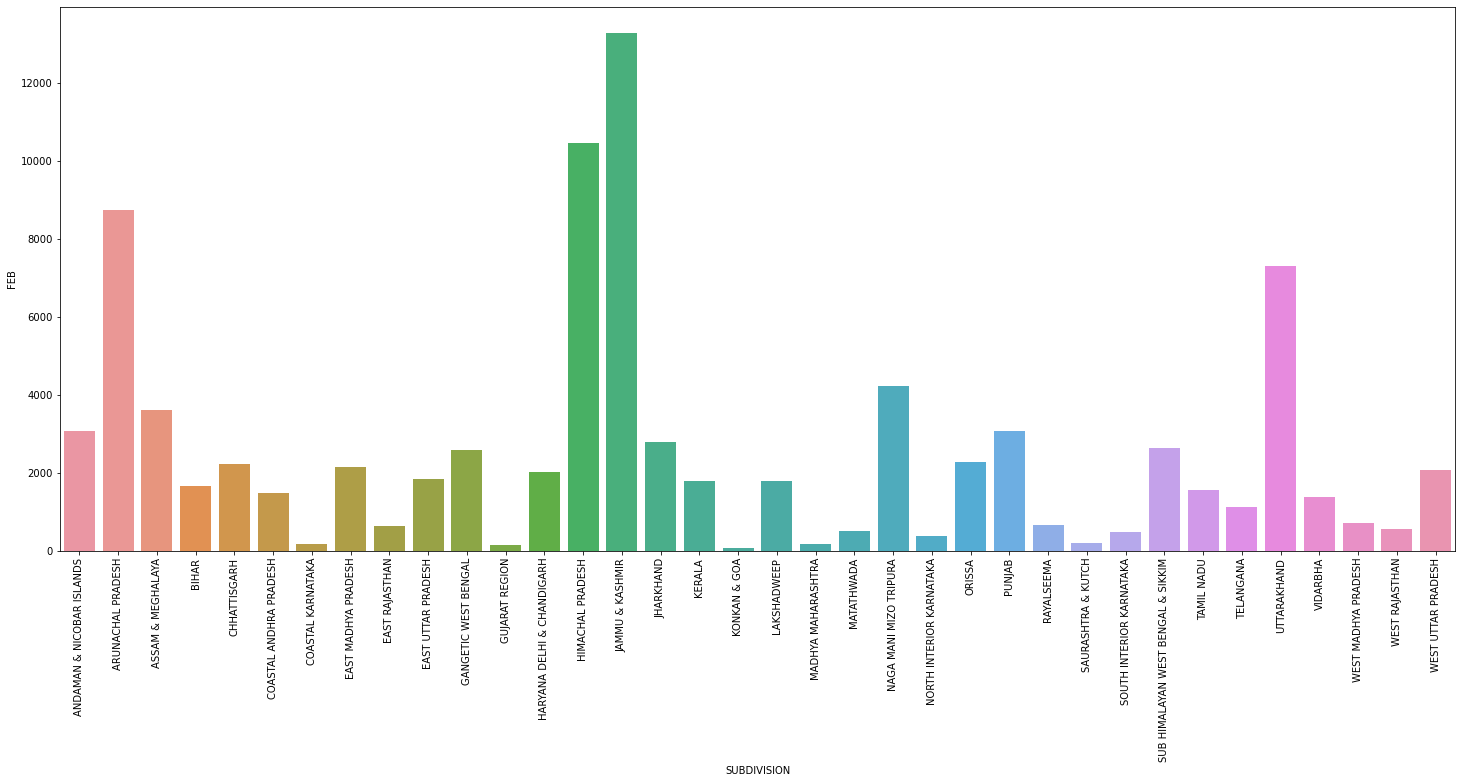

In [12]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="FEB")
plt.xticks(rotation=90)
plt.show()

**March**

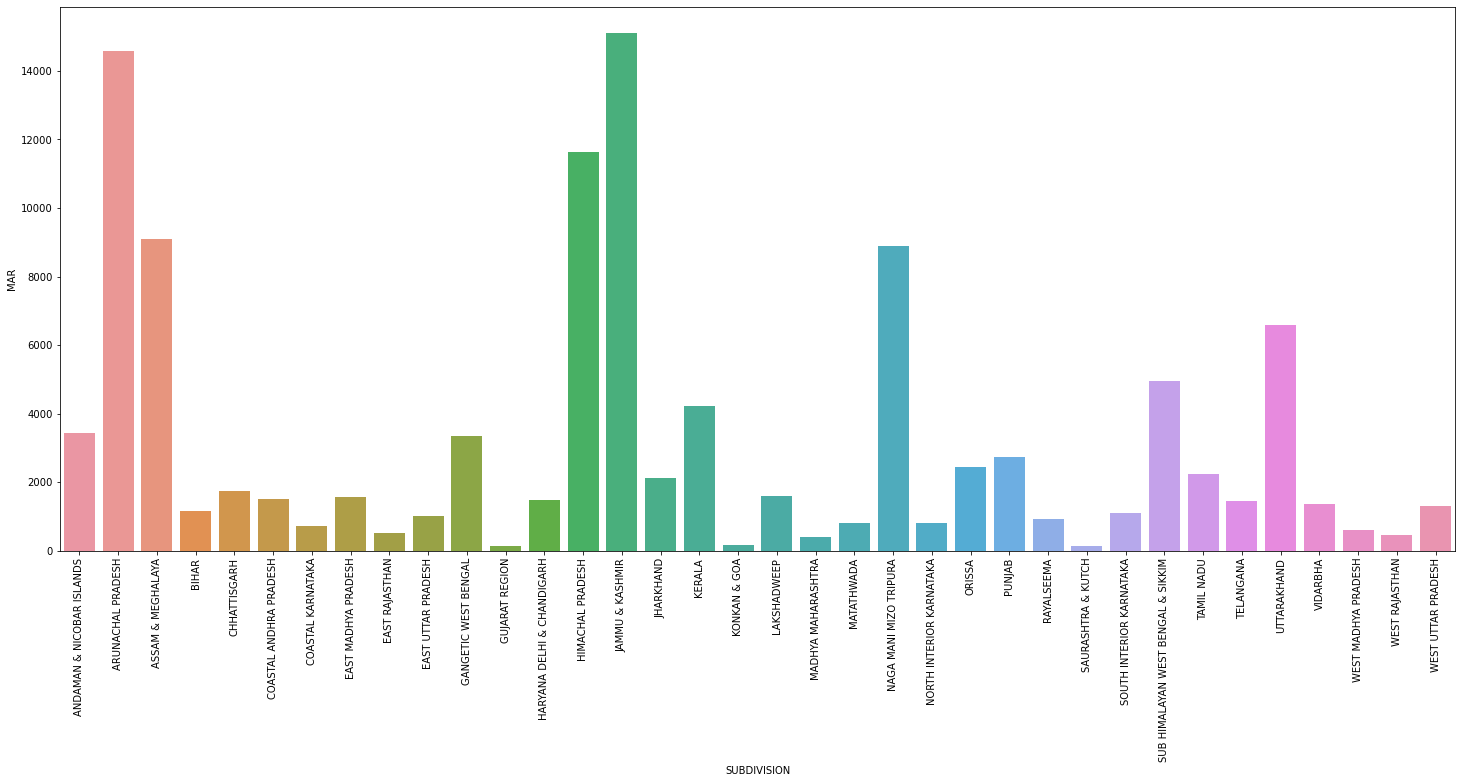

In [13]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="MAR")
plt.xticks(rotation=90)
plt.show()

**April**

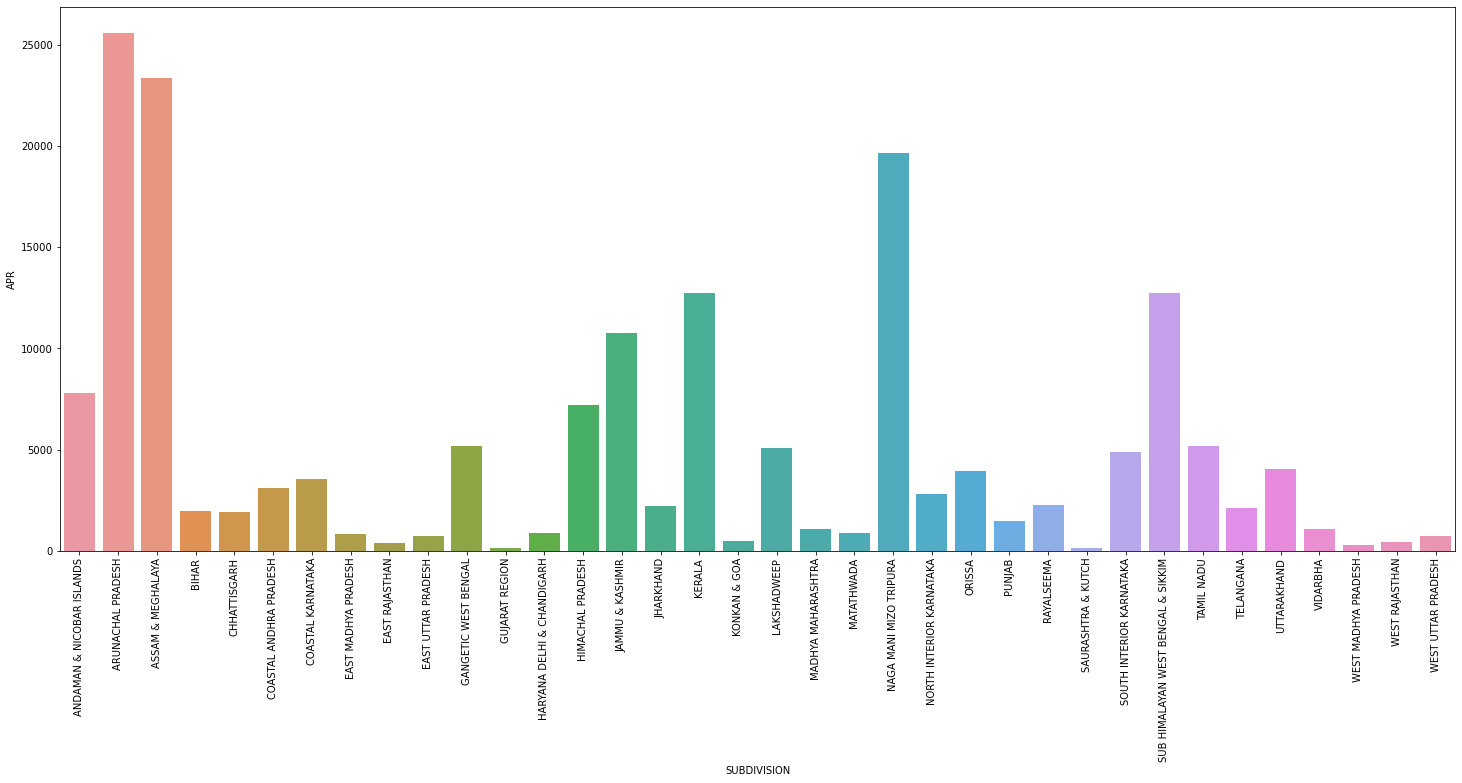

In [14]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="APR")
plt.xticks(rotation=90)
plt.show()

**May**

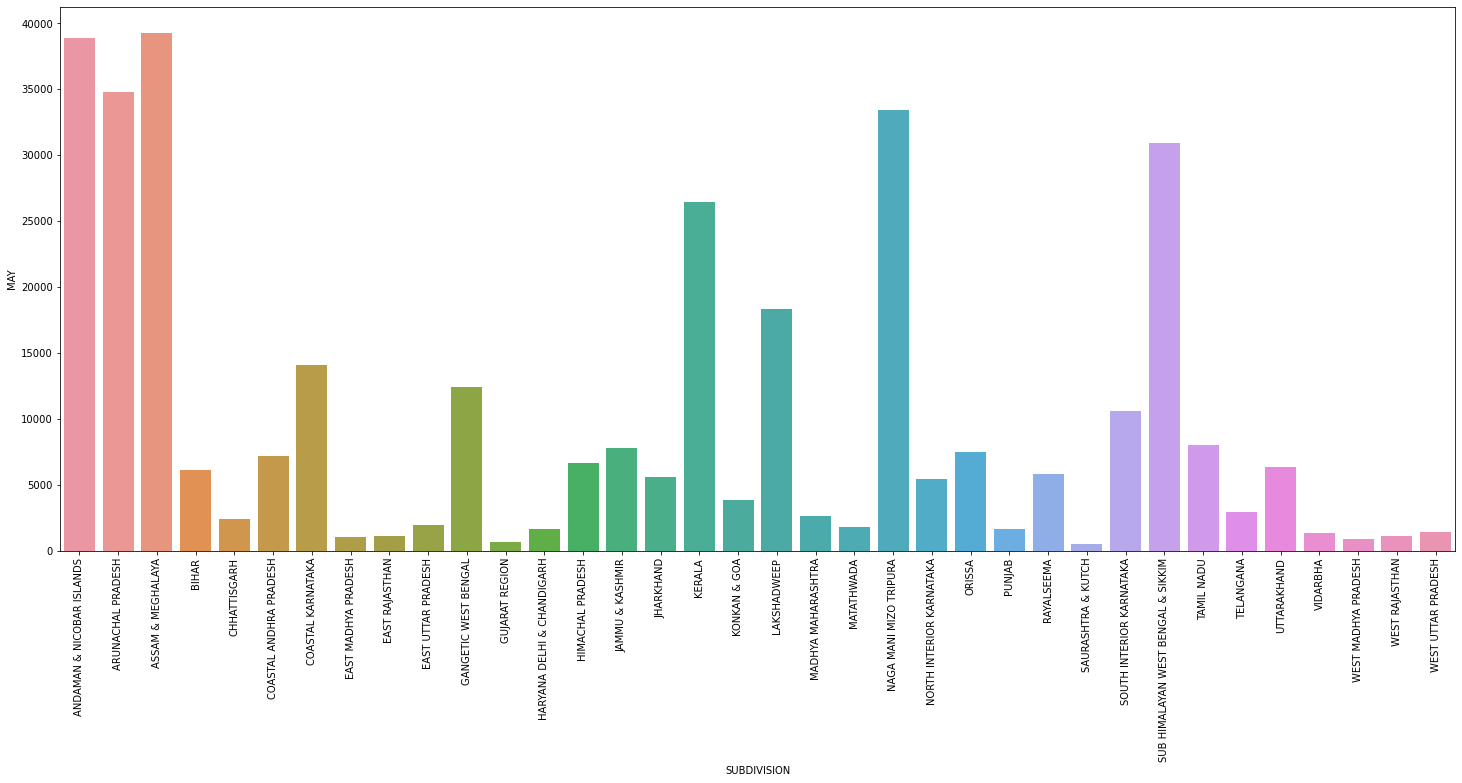

In [15]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="MAY")
plt.xticks(rotation=90)
plt.show()

**June**

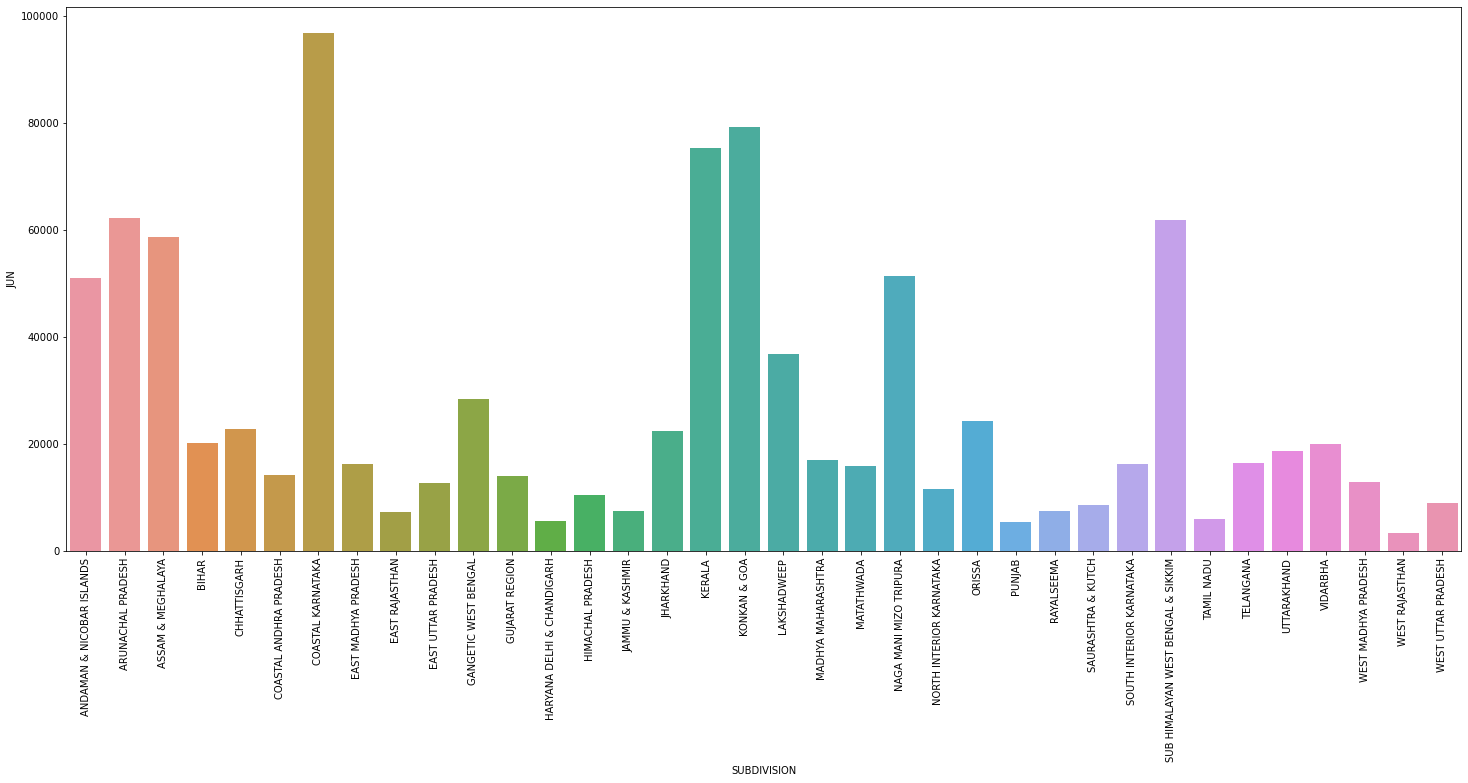

In [16]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="JUN")
plt.xticks(rotation=90)
plt.show()

**July**

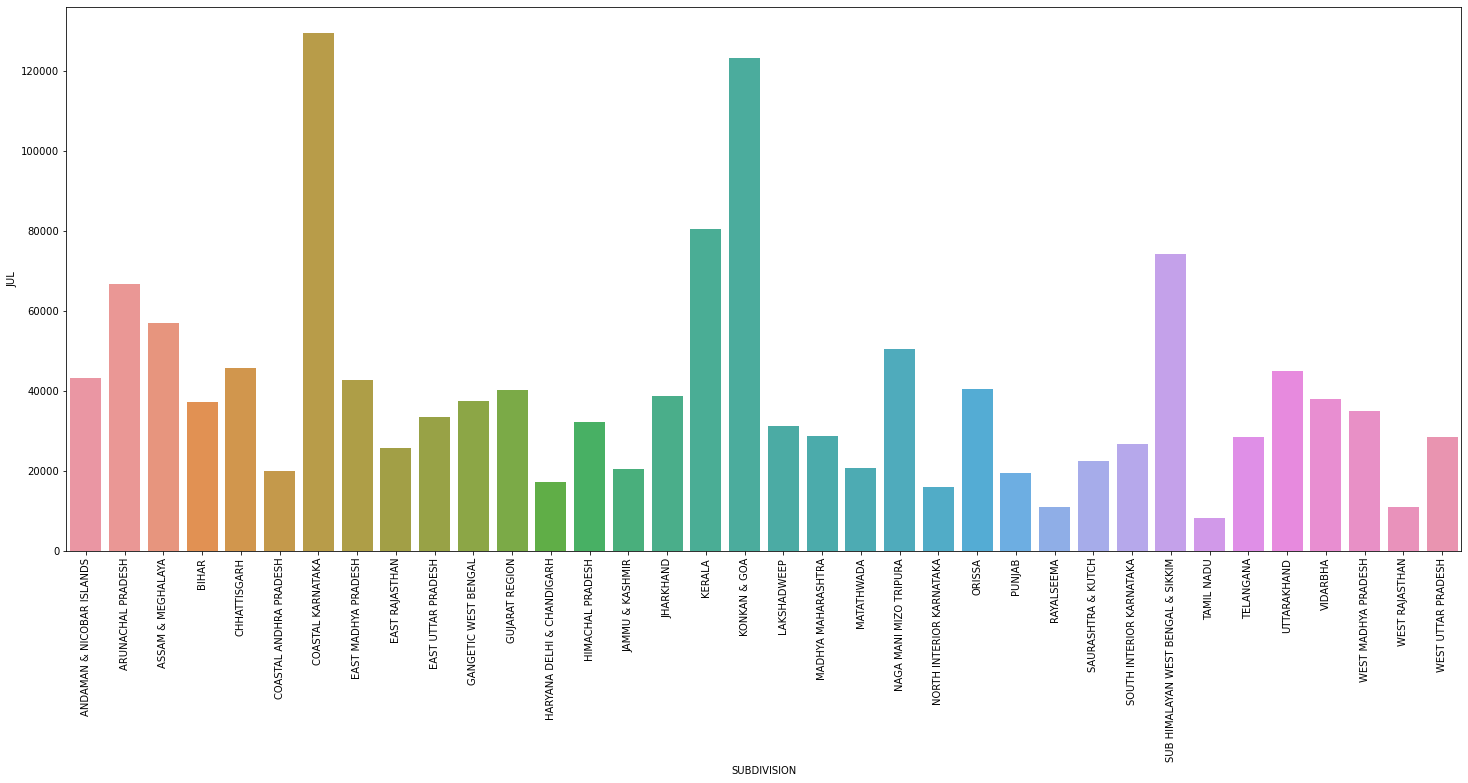

In [17]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="JUL")
plt.xticks(rotation=90)
plt.show()

**August**

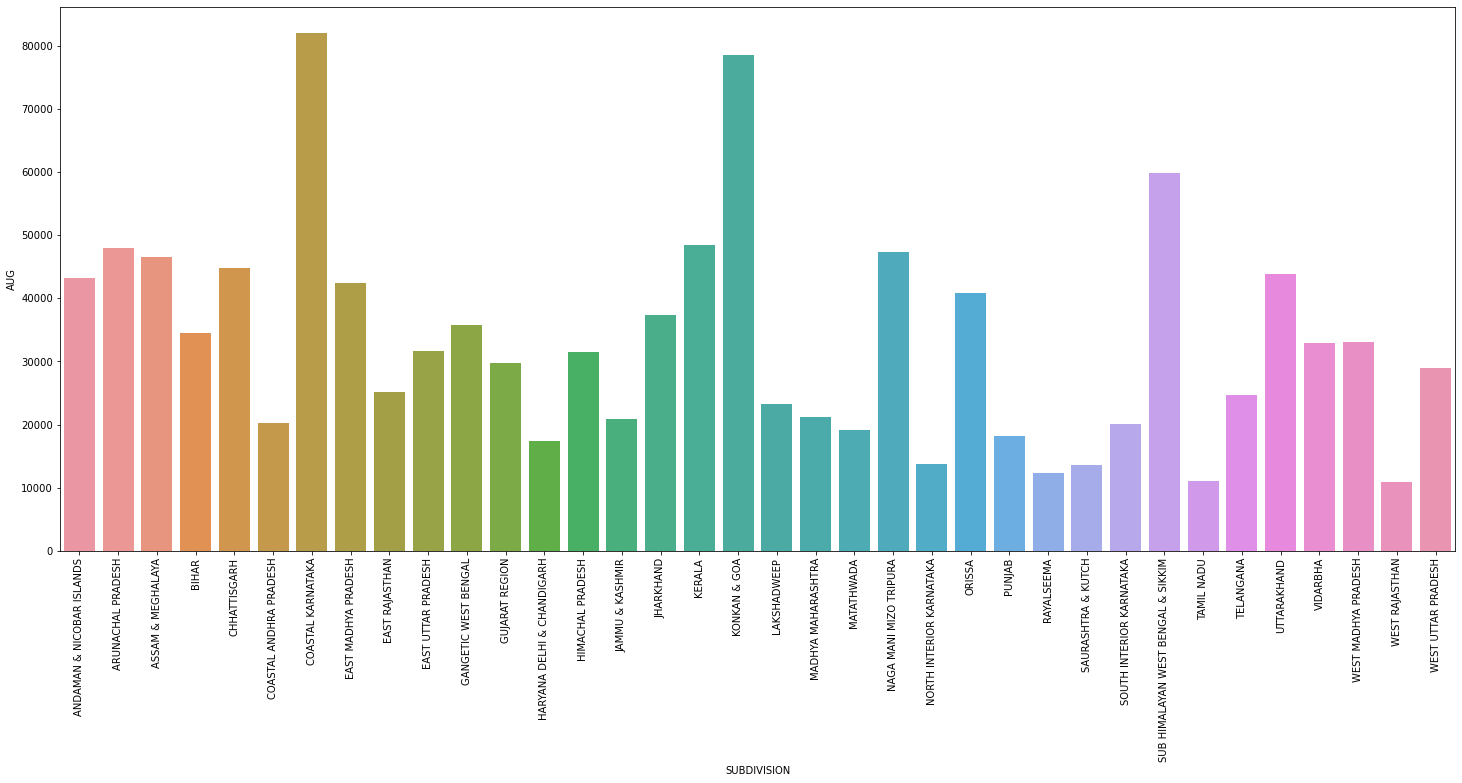

In [18]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="AUG")
plt.xticks(rotation=90)
plt.show()

**September**

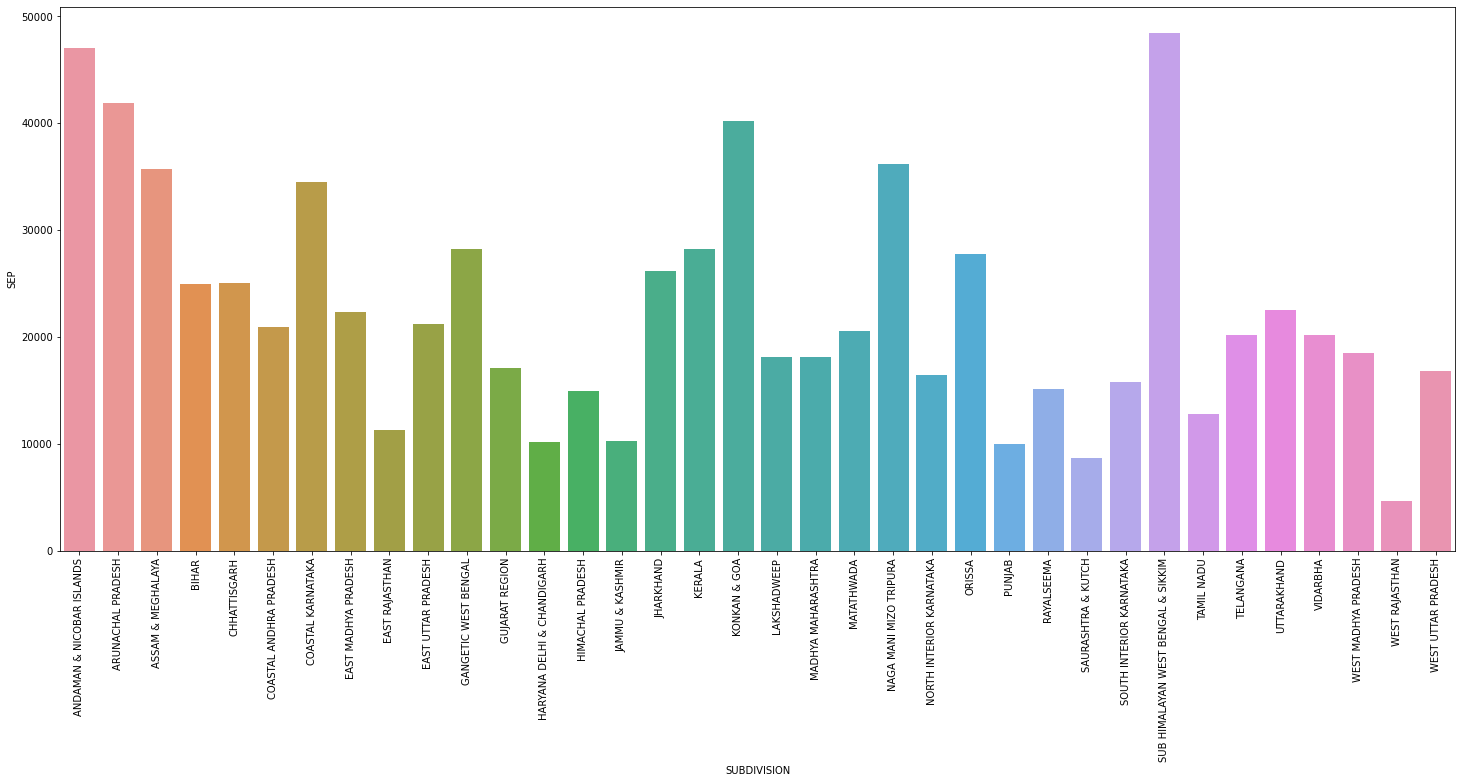

In [19]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="SEP")
plt.xticks(rotation=90)
plt.show()

**October**

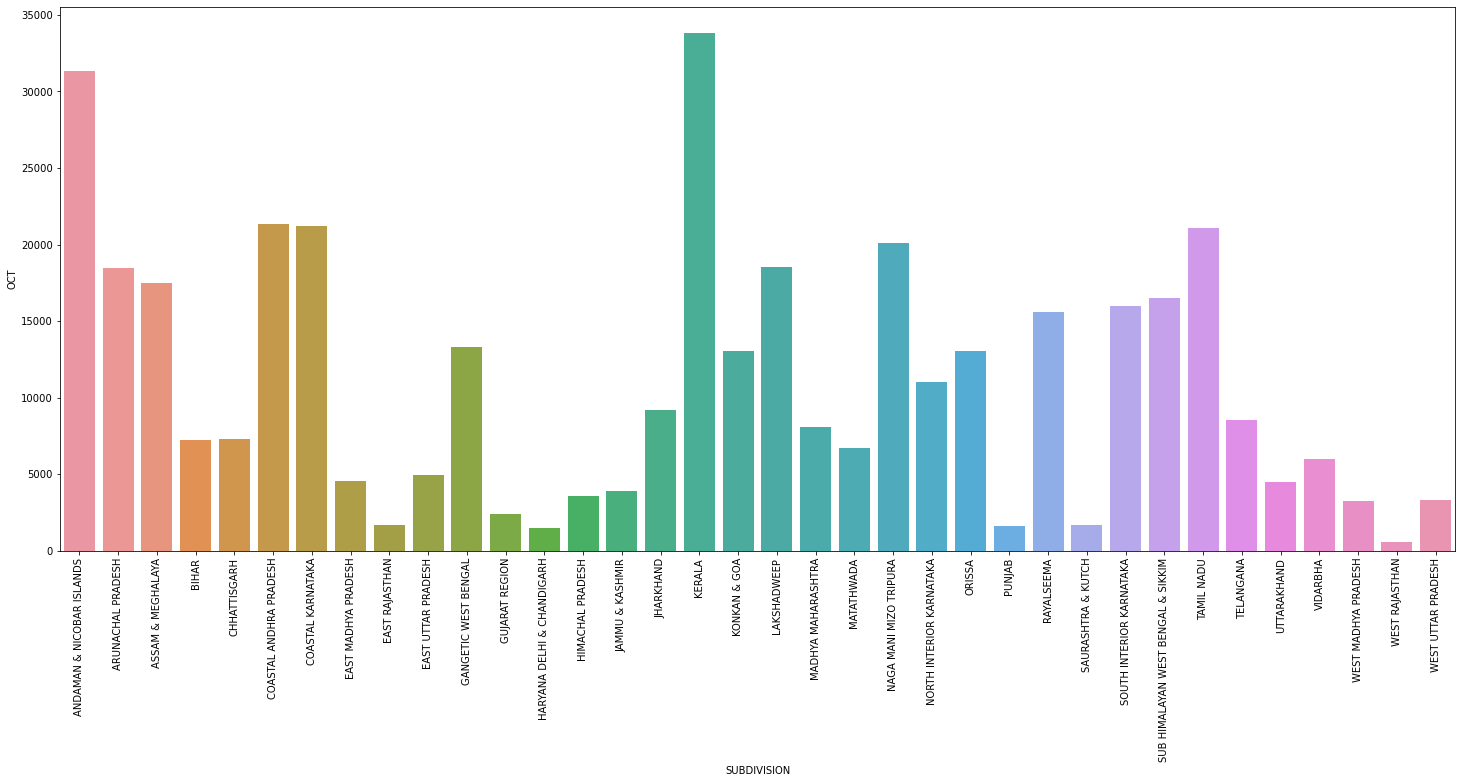

In [20]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="OCT")
plt.xticks(rotation=90)
plt.show()

**November**

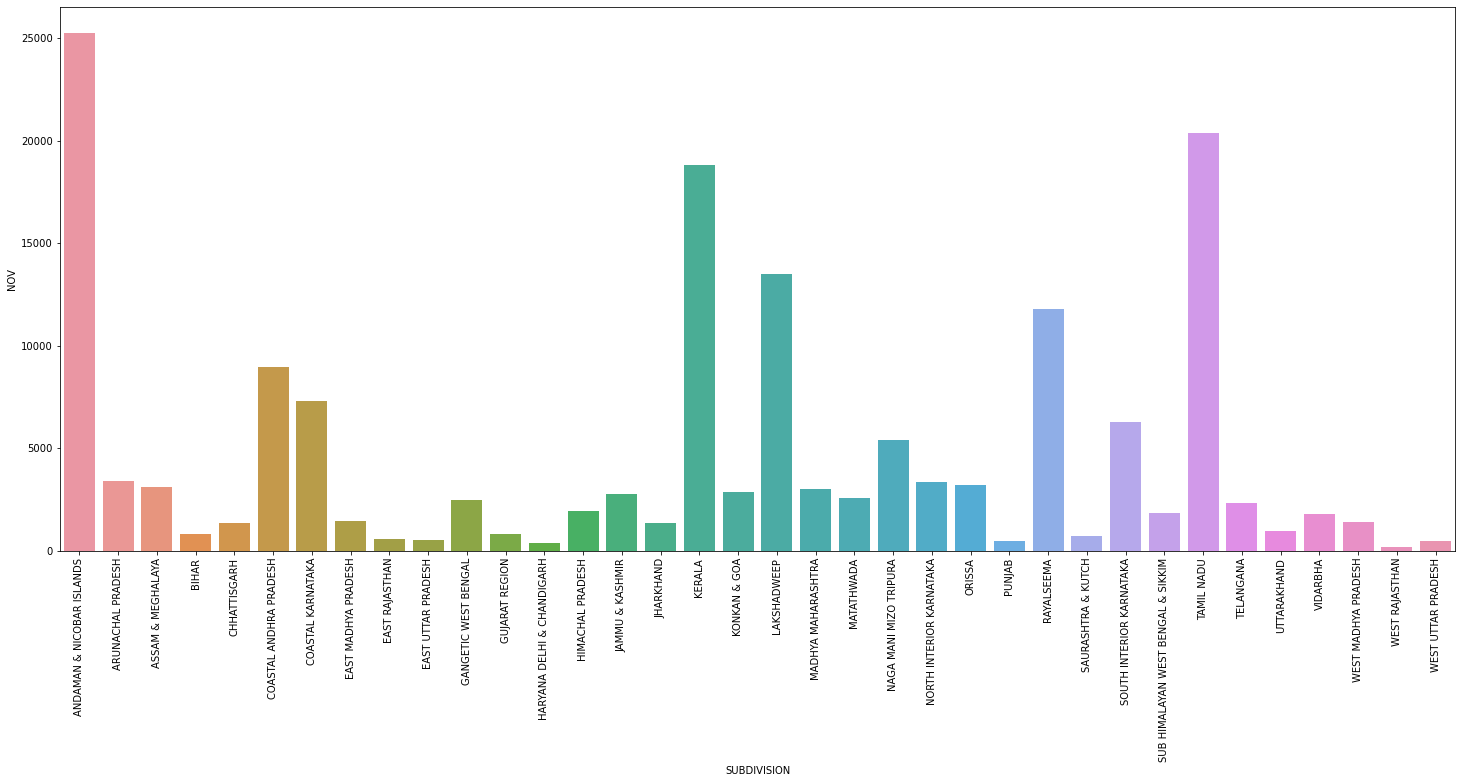

In [21]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="NOV")
plt.xticks(rotation=90)
plt.show()

**December**

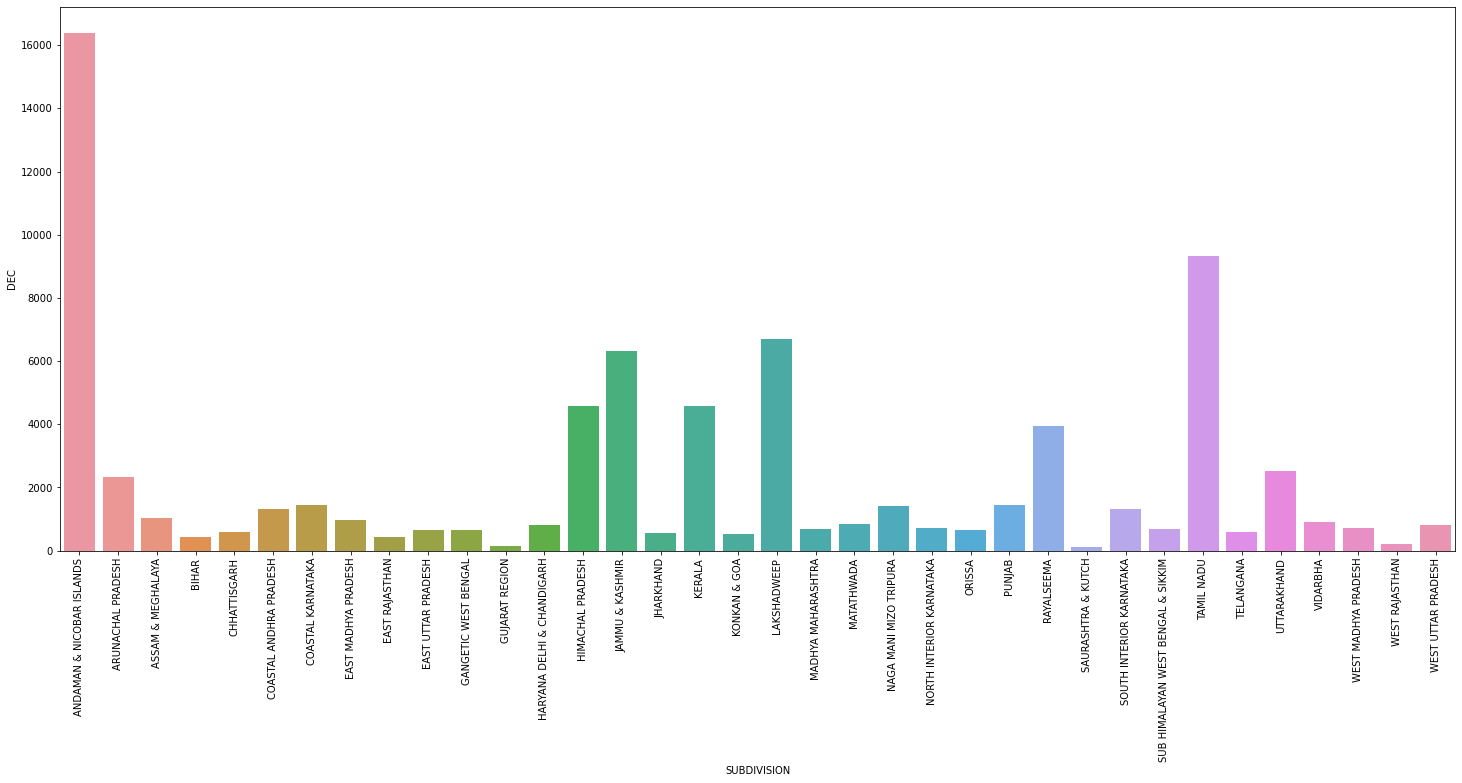

In [22]:
plt.figure(figsize=(25,10))
sns.barplot(data=df2,x="SUBDIVISION",y="DEC")
plt.xticks(rotation=90)
plt.show()

# TAMIL NADU

In [23]:
STATE=zx[zx.STATE_UT_NAME == 'TAMIL NADU']

# **Annual rainfall in punjab district**

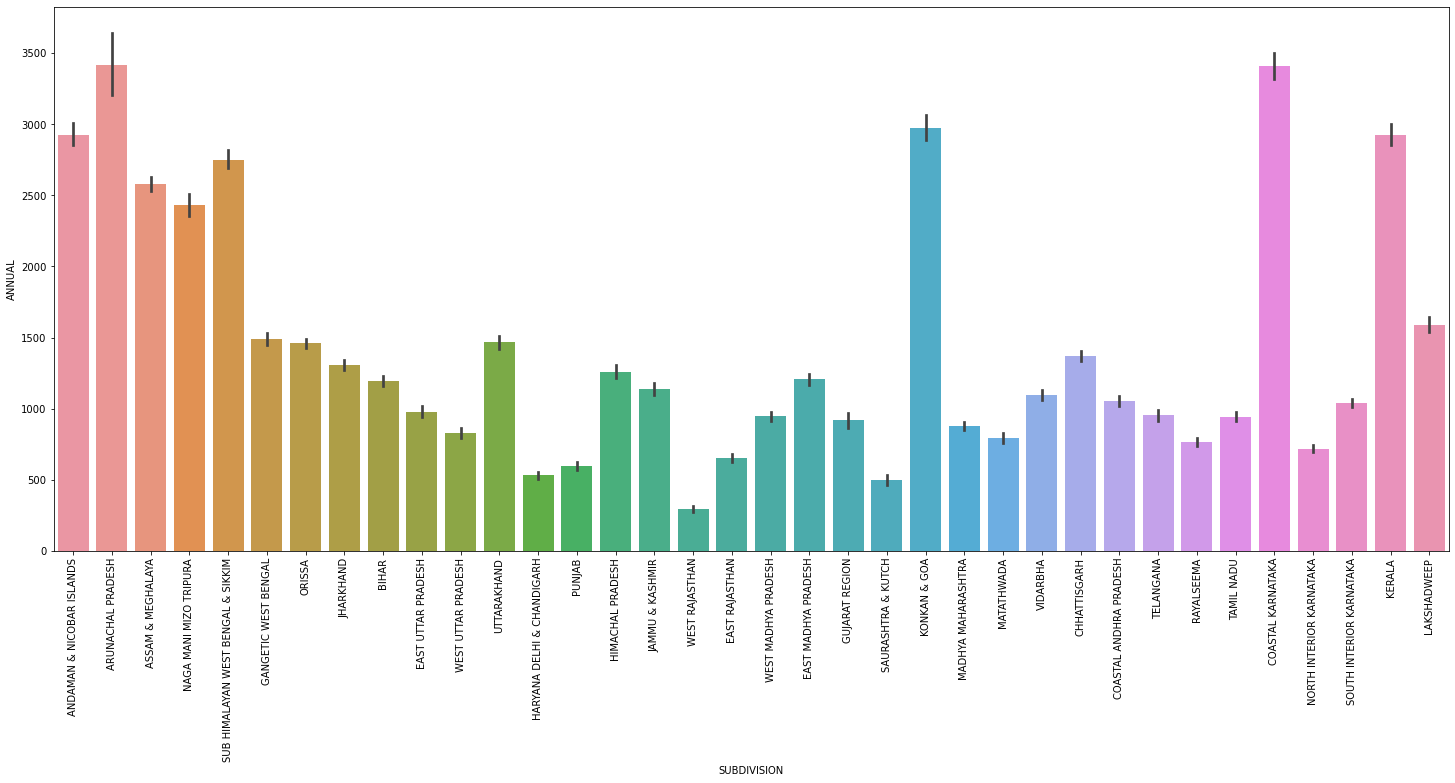

In [25]:
plt.figure(figsize=(25,10))
sns.barplot(data=df,x="SUBDIVISION",y="ANNUAL")
plt.xticks(rotation=90)
plt.show()

In [26]:
STATE=df[df.SUBDIVISION == 'TAMIL NADU']

# **Annual rainfall in JABjab between 1901 to 2015**

In [27]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

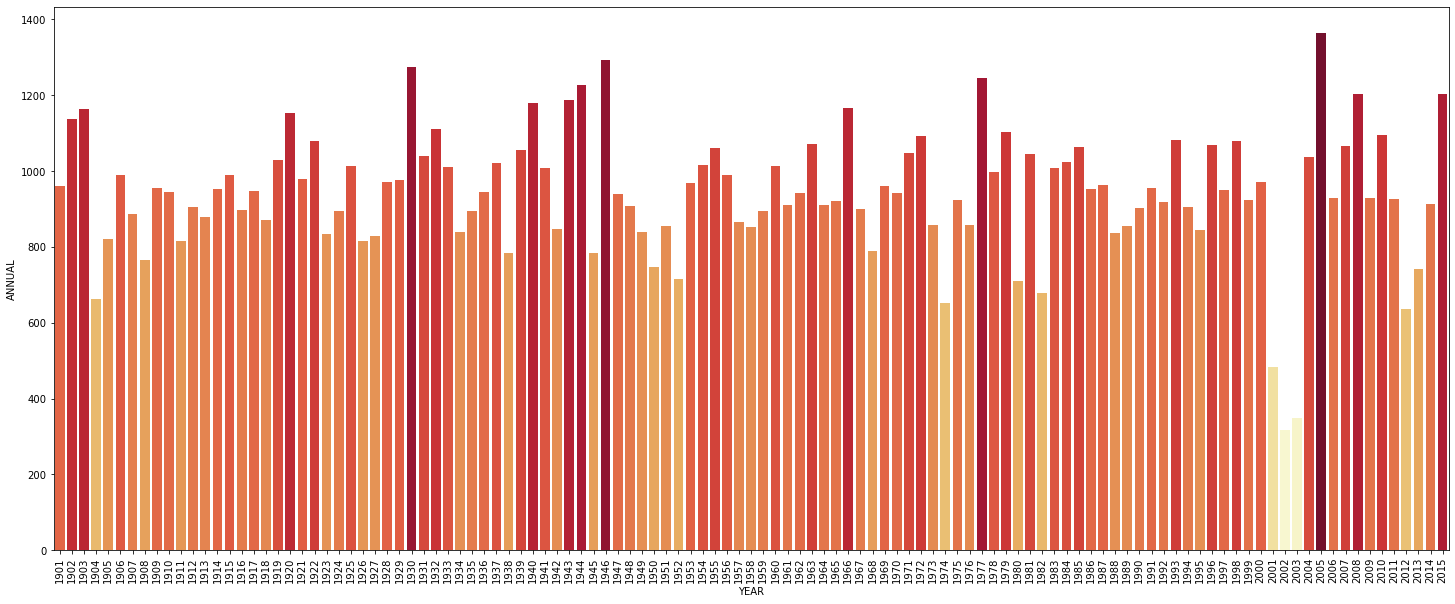

In [29]:
plt.figure(figsize=(25,10))

sns.barplot(data=STATE, x="YEAR",y="ANNUAL", palette=colors_from_values(STATE["ANNUAL"], "YlOrRd"))
plt.xticks(rotation=90)
plt.savefig('./india.png')

**Annual rainfall in punjab between 1901 to 2015 in January**

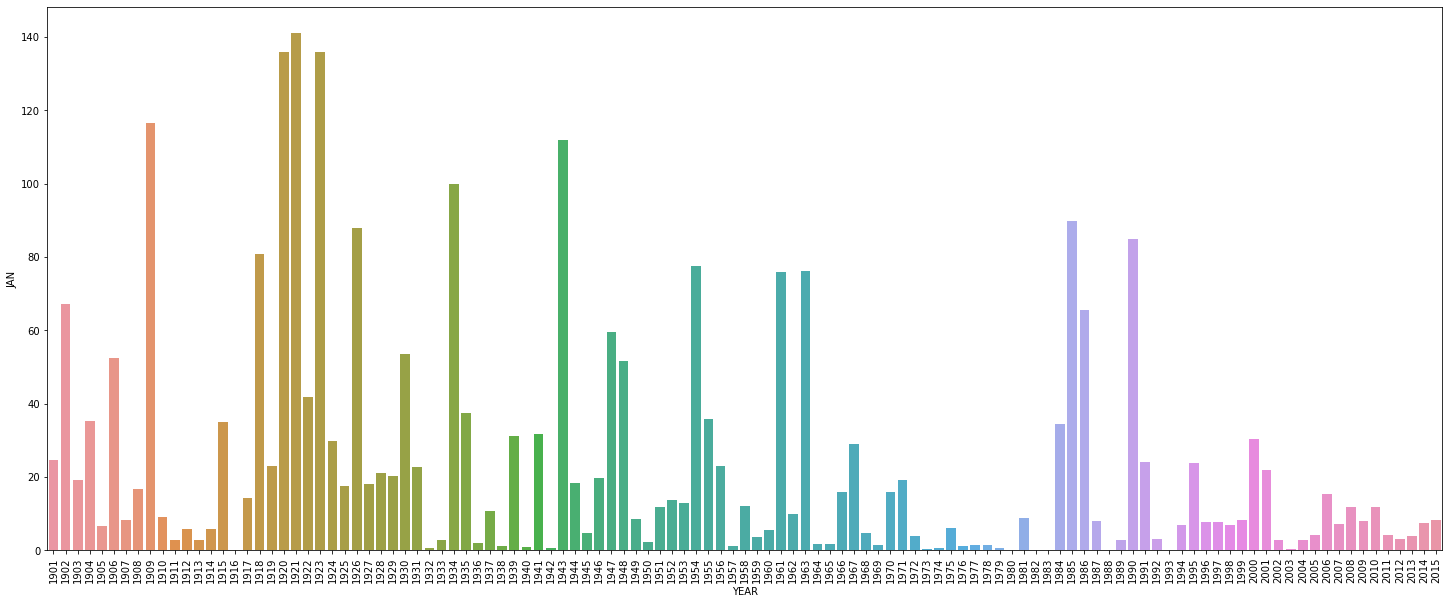

In [30]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="JAN")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in February**

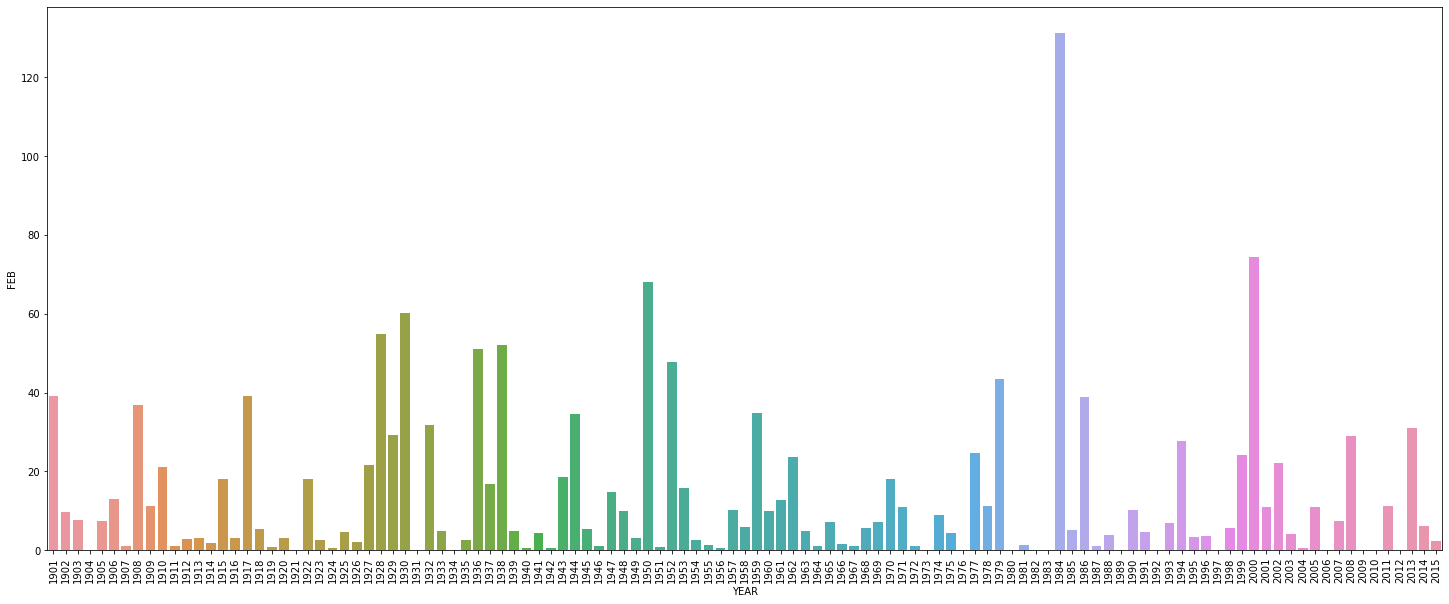

In [31]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="FEB")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in March**

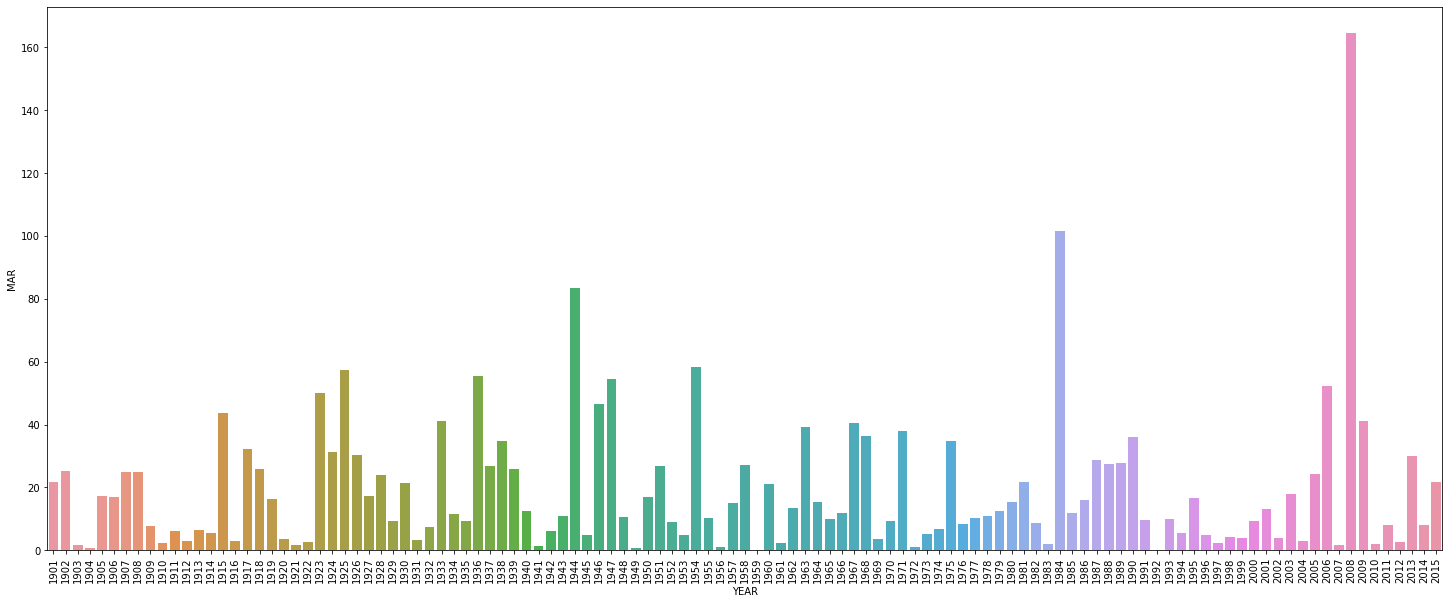

In [32]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="MAR")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in April**

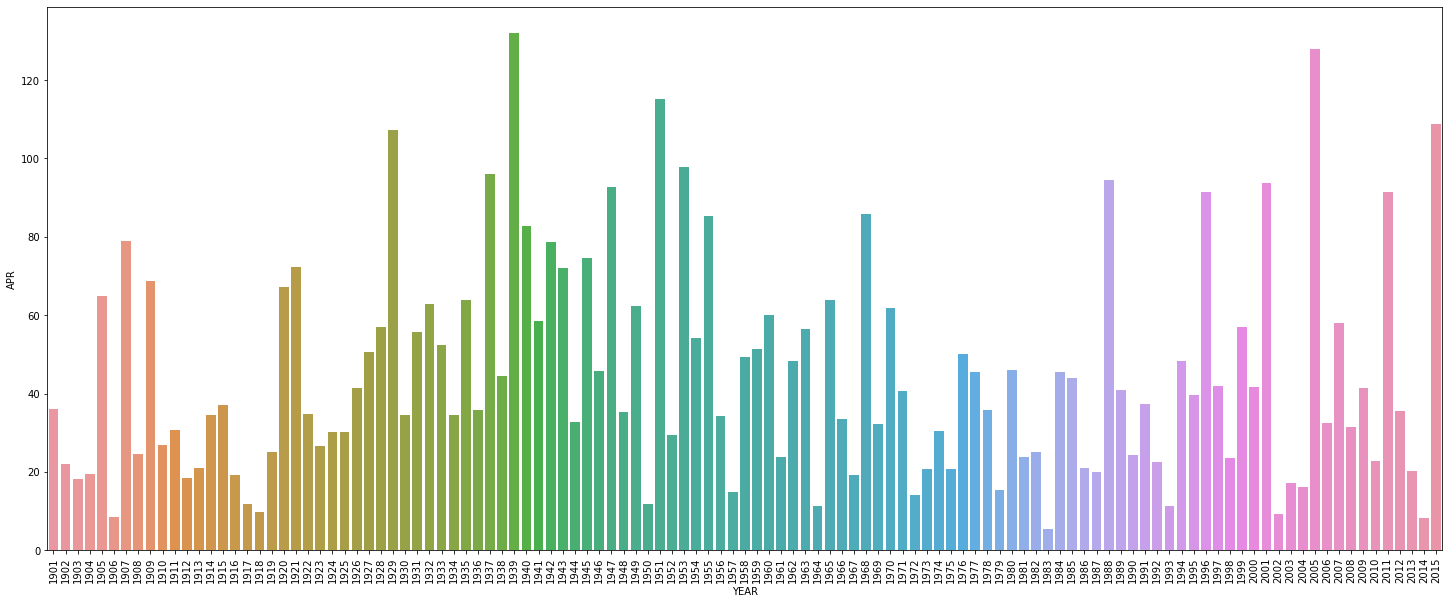

In [33]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="APR")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in May**

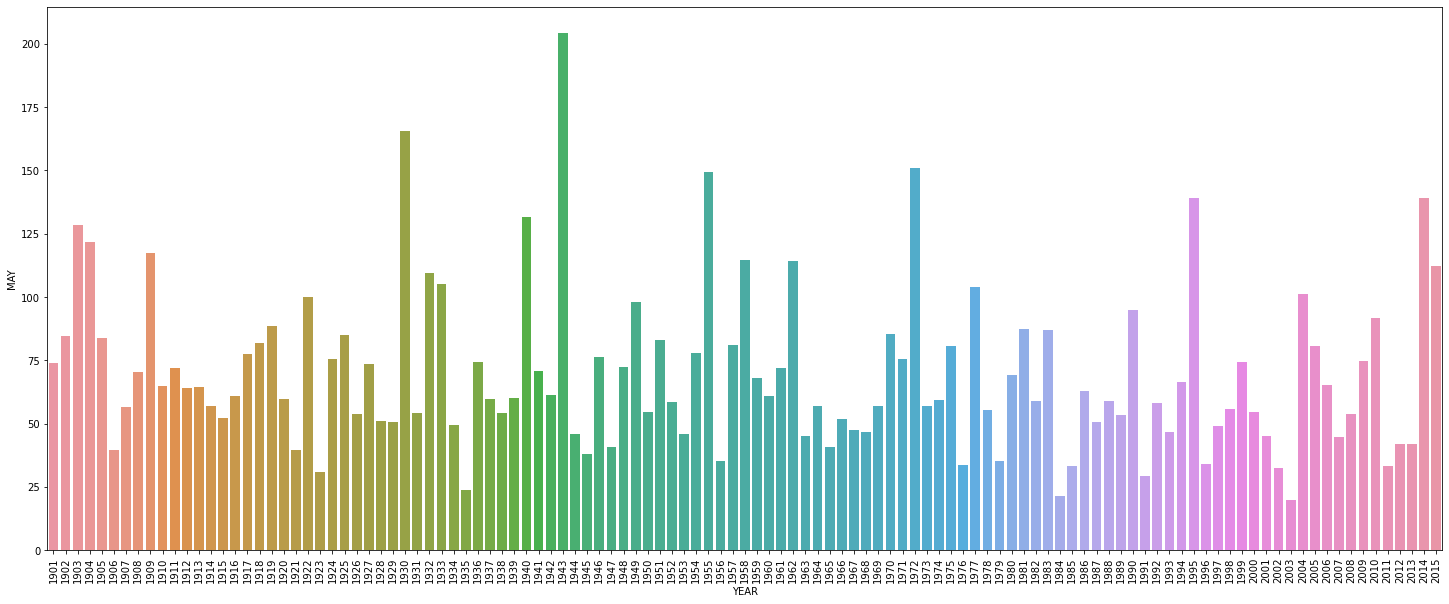

In [34]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="MAY")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in June**

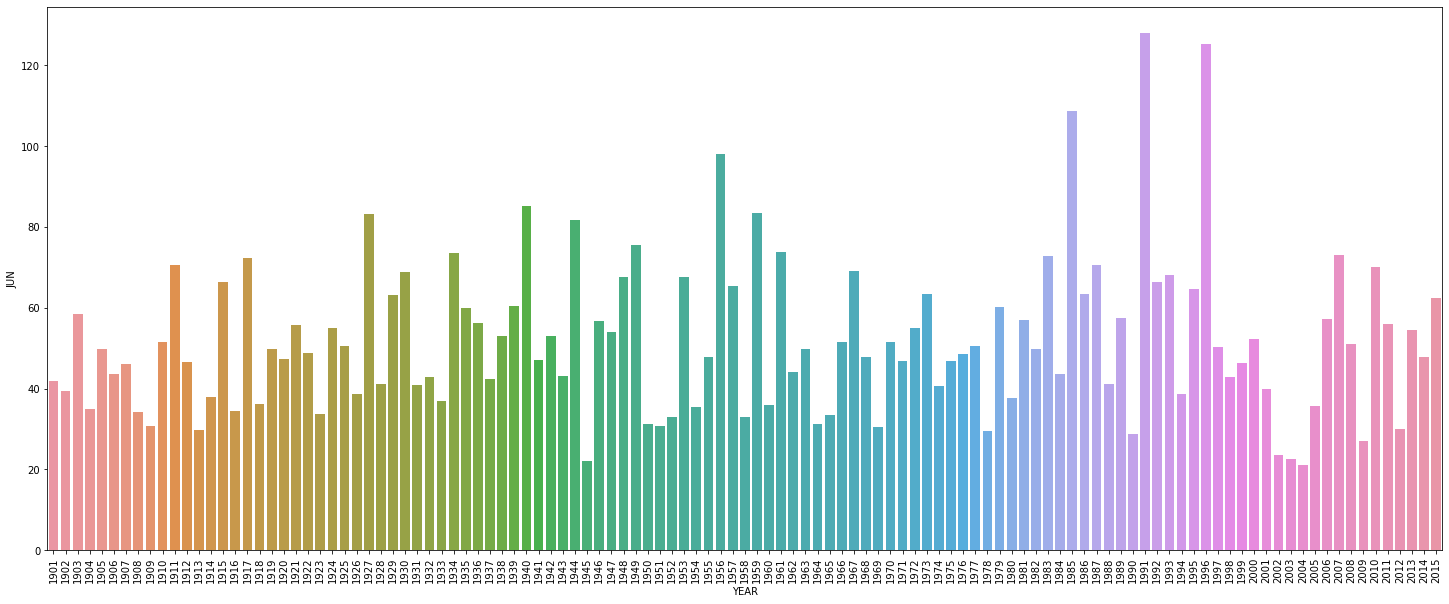

In [35]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="JUN")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in July**

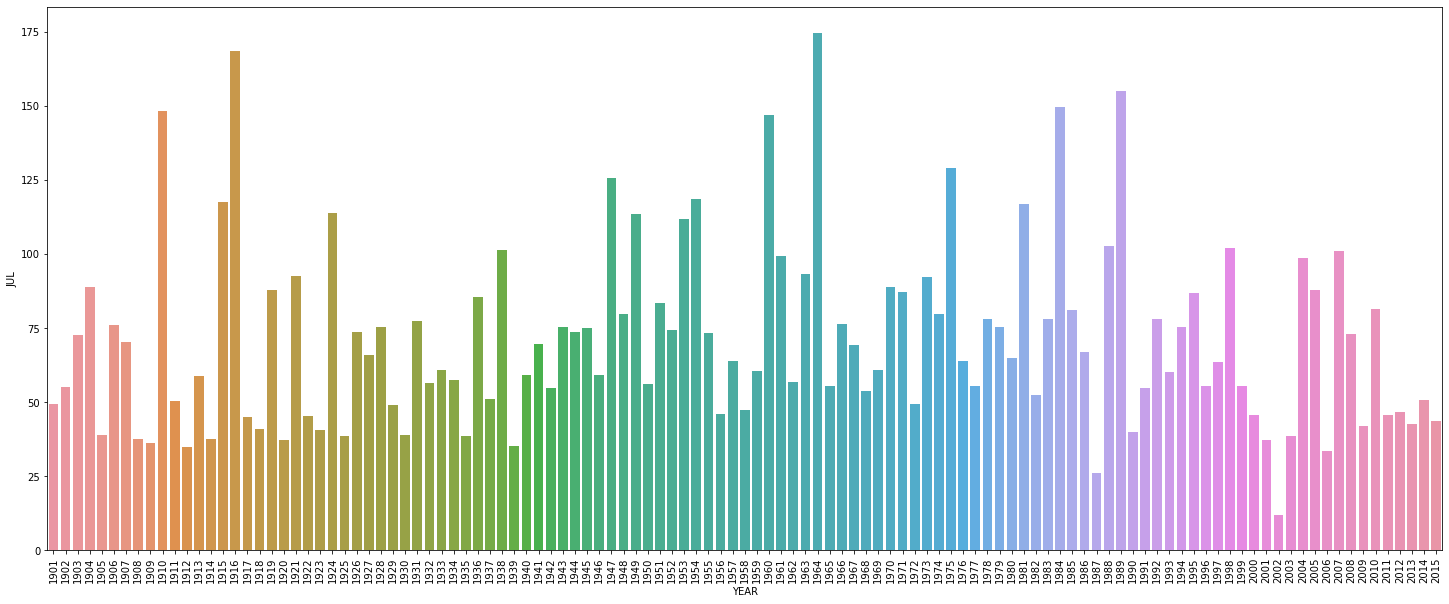

In [36]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="JUL")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in August**

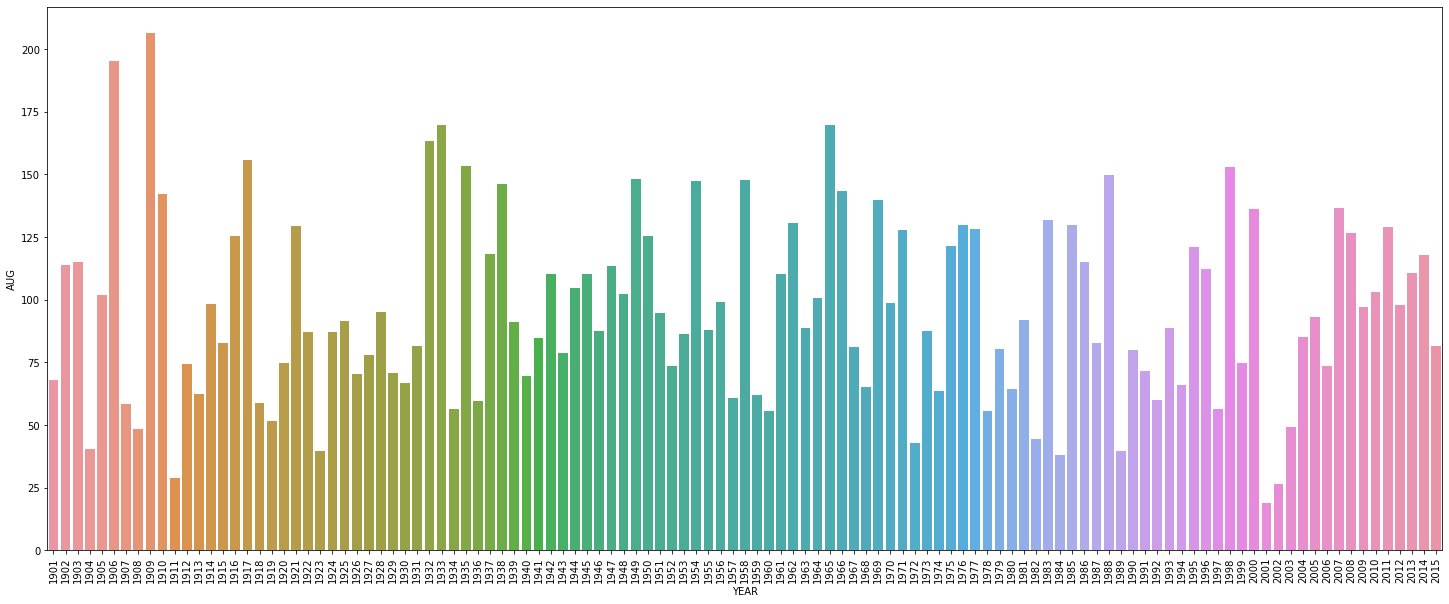

In [37]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="AUG")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in September**

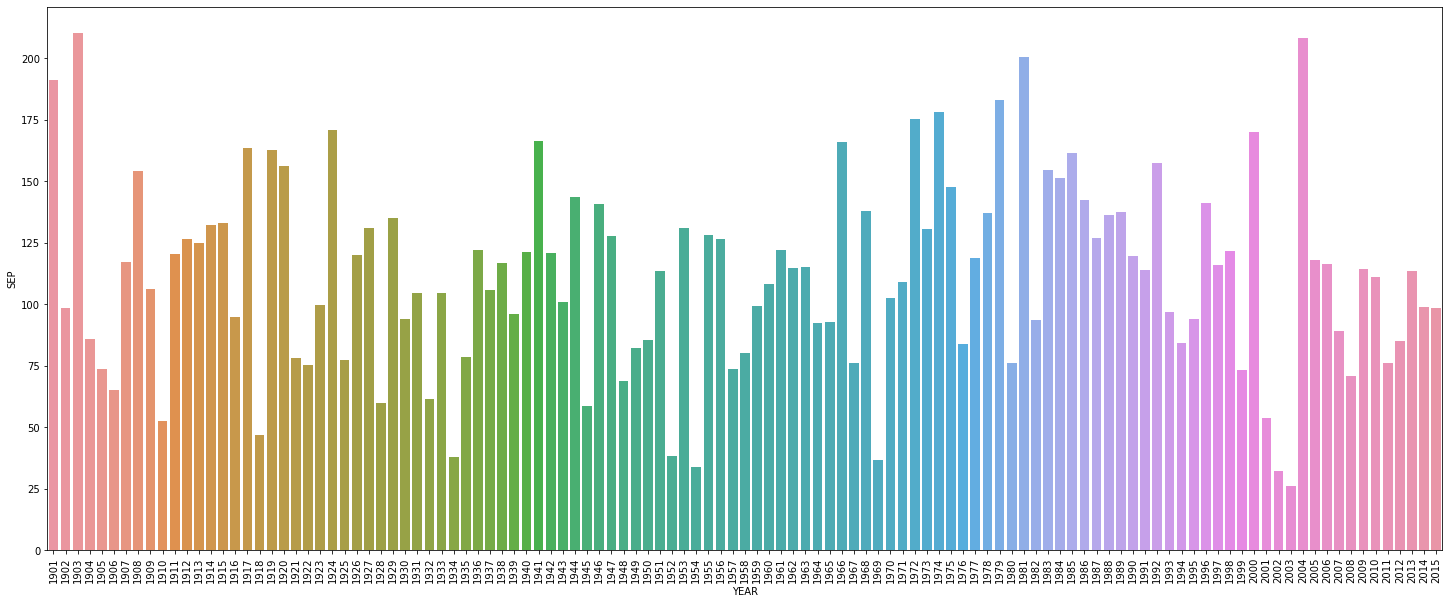

In [38]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="SEP")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in October**

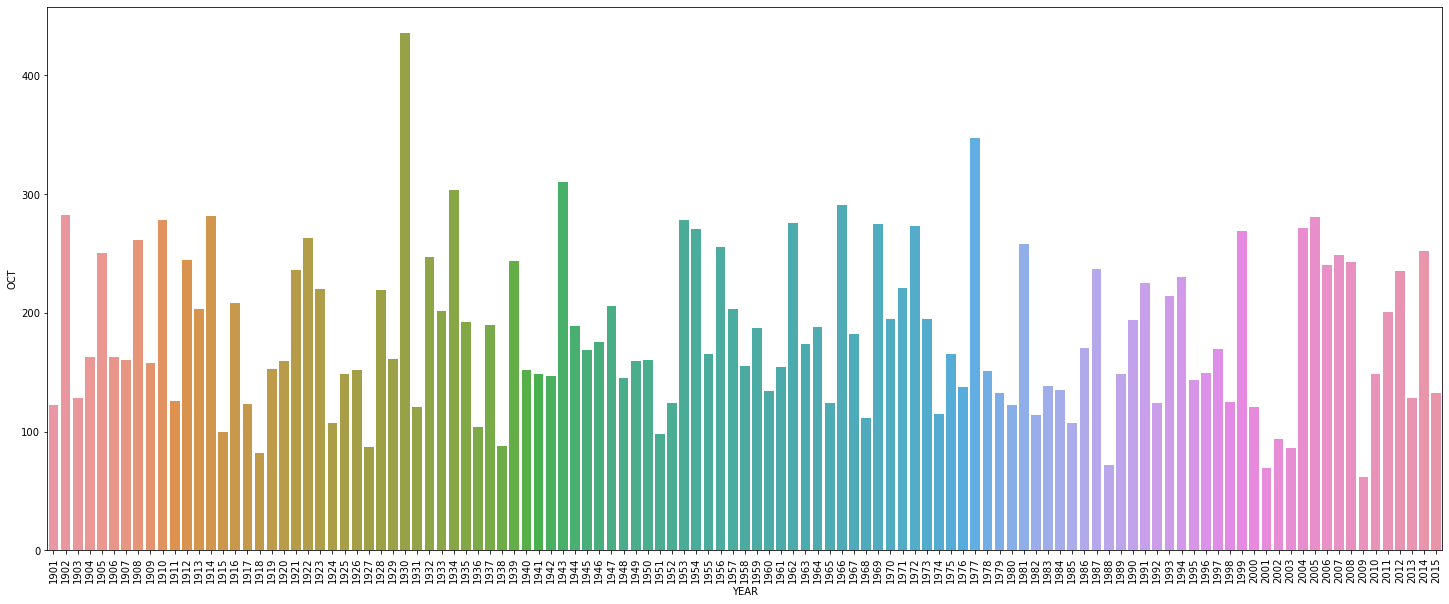

In [39]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="OCT")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in November**

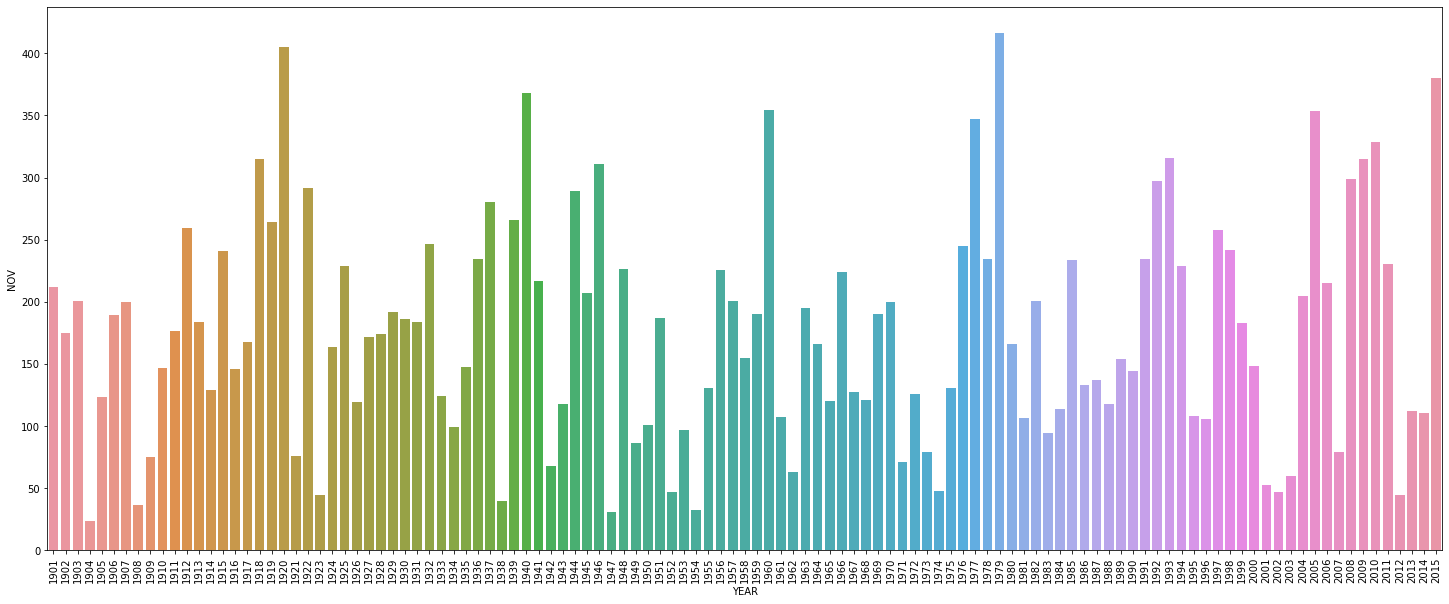

In [40]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="NOV")
plt.xticks(rotation=90)
plt.show()

**Annual rainfall in punjab between 1901 to 2015 in December**

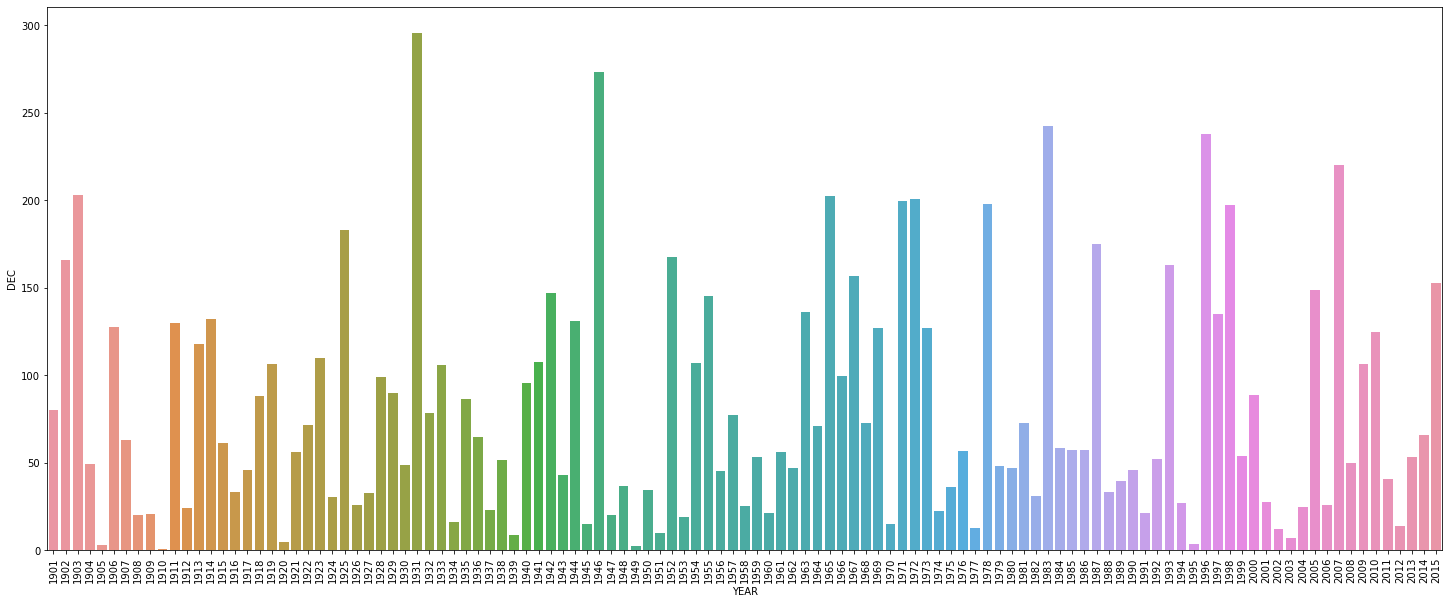

In [41]:
plt.figure(figsize=(25,10))
sns.barplot(data=STATE,x="YEAR",y="DEC")
plt.xticks(rotation=90)
plt.show()

---